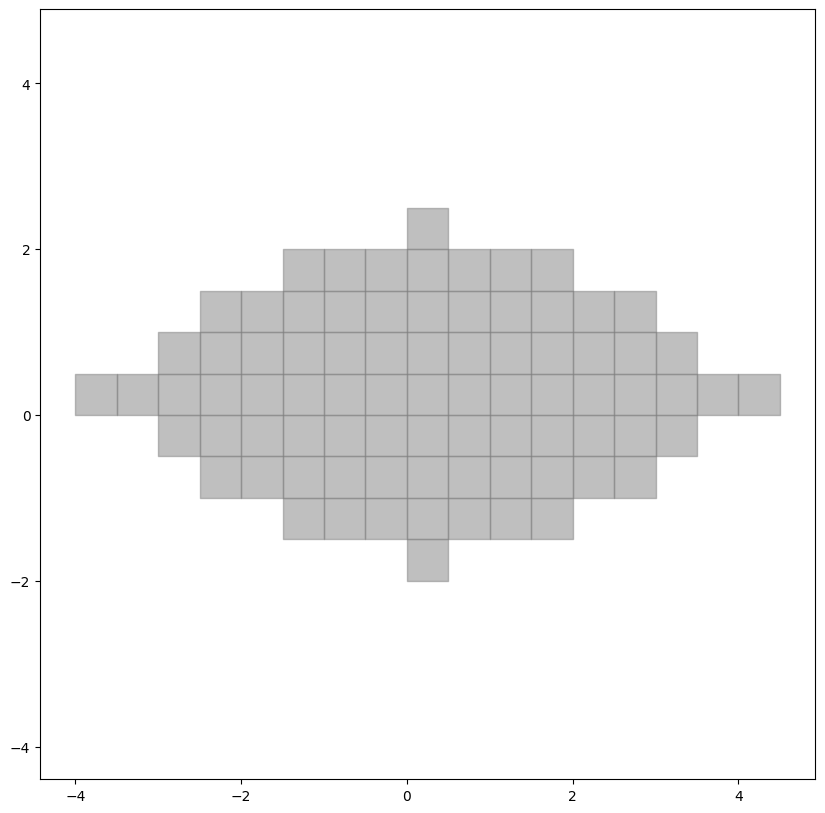

In [31]:
import numpy as np

from src.geometry.pattern_unit import (
    PatternUnit,
    Shape,
    PatternTransformation,
    PatternTransformationVector,
    Pattern,
)
from src.grid.visualize_points import visualize_points


shape = Shape(
    w=10,
    h=5,
    area_functions=[
        # lambda x, y: x**2 + y**2 <= 25,  # circle
        lambda x, y: x**2 / 9 + y**2 / 4 <= 1,  # ellipse
        lambda x, y: abs(x / 2) + abs(y) <= 2,  # diamond
        # lambda x, y: y >= x**2 / 4 + 1,  # parabola
    ],
)


# create the pattern unit
pattern_unit = PatternUnit(shape, k=0.5)


visualize_points(pattern_unit.shape_matrix, k=pattern_unit.grid.k)

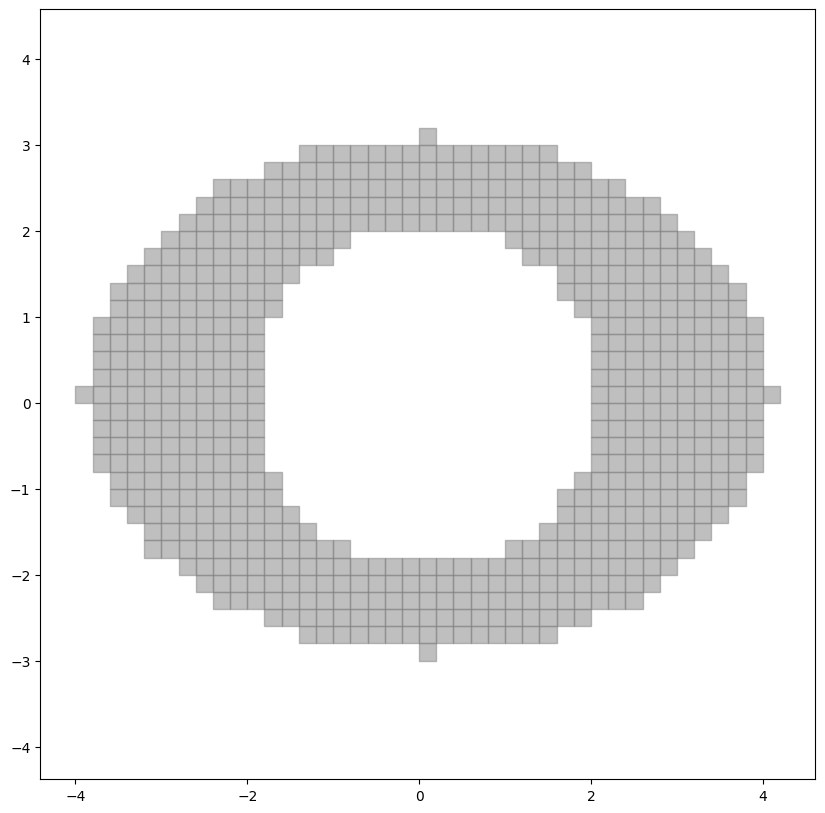

In [32]:
shape2 = Shape(
    w=10,
    h=10,
    area_functions=[
        lambda x, y: x**2 / 16 + y**2 / 9 <= 1 and x**2 + y**2 >= 4,  # Donut
    ],
)

# create the pattern unit
pattern_unit2 = PatternUnit(shape2, k=0.2)

visualize_points(pattern_unit2.shape_matrix, k=pattern_unit2.grid.k)

min_phi: 0.3760079133641484, Phi: 0.39269908169872414
(76558, 2)


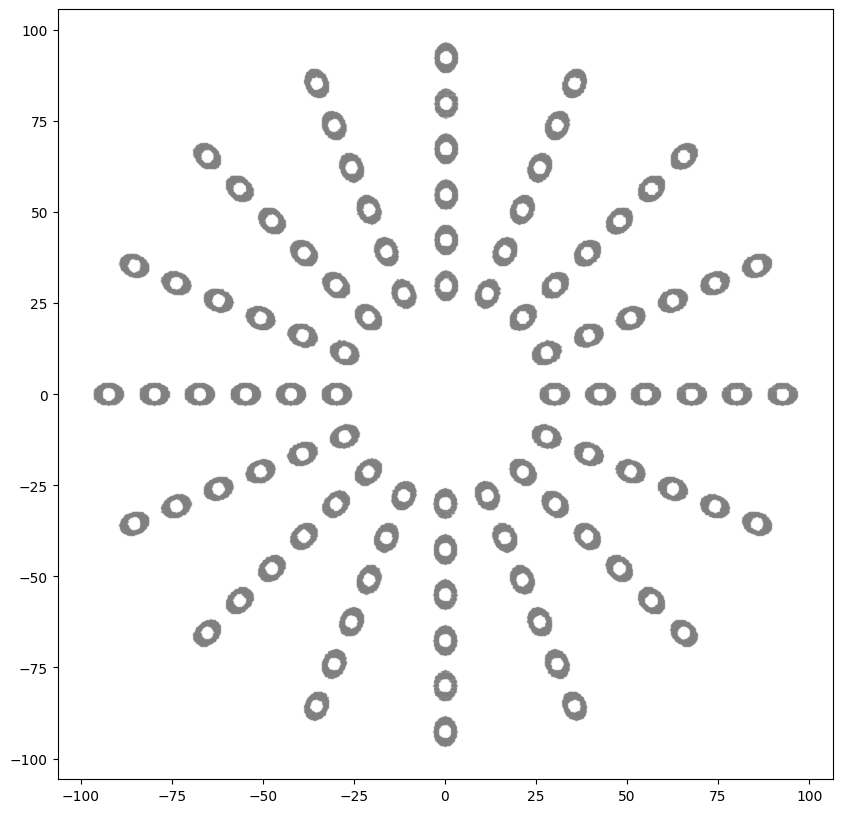

In [33]:
circular_transformation = PatternTransformation(
    Dx=2.5,
    Od=25,
    Phi=np.pi / 8,
)


circular_transformation_vector = PatternTransformationVector(
    pattern_unit=pattern_unit2,
    pattern_transformation=circular_transformation,
    pattern_bound=((-100, 100), (-100, 100)),
)
circular_pattern = Pattern(
    pattern_unit=pattern_unit2,
    pattern_transformation_vector=circular_transformation_vector,
)

print(circular_pattern.pattern_matrix.shape)

visualize_points(
    circular_pattern.pattern_matrix, k=circular_pattern.pattern_unit.grid.k
)

min_phi: 0.2921381743394878, Phi: 0.3141592653589793
(3678, 2)


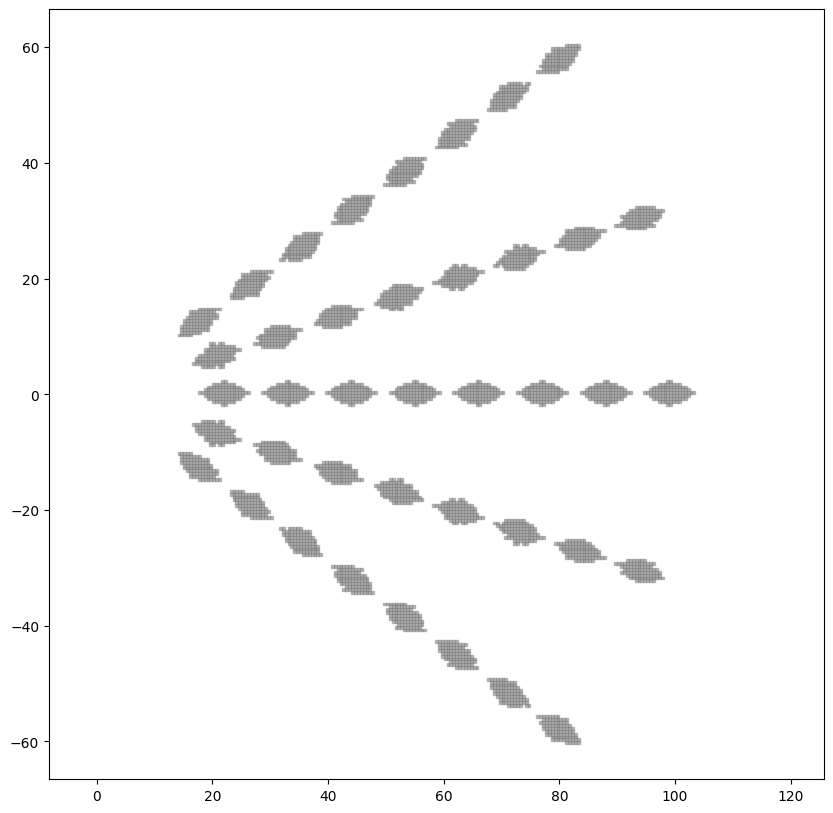

In [34]:
corn_transformation = PatternTransformation(
    Dx=1,
    Od=16.5,
    Phi=np.pi / 10,
    Rotate_count=4,
)

corn_transformation_vector = PatternTransformationVector(
    pattern_unit=pattern_unit,
    pattern_transformation=corn_transformation,
    pattern_bound=((0, 100), (0, 100)),
)


corn_pattern = Pattern(
    pattern_unit=pattern_unit,
    pattern_transformation_vector=corn_transformation_vector,
)

print(corn_pattern.pattern_matrix.shape)

visualize_points(corn_pattern.pattern_matrix, k=corn_pattern.pattern_unit.grid.k)

(34020, 2)


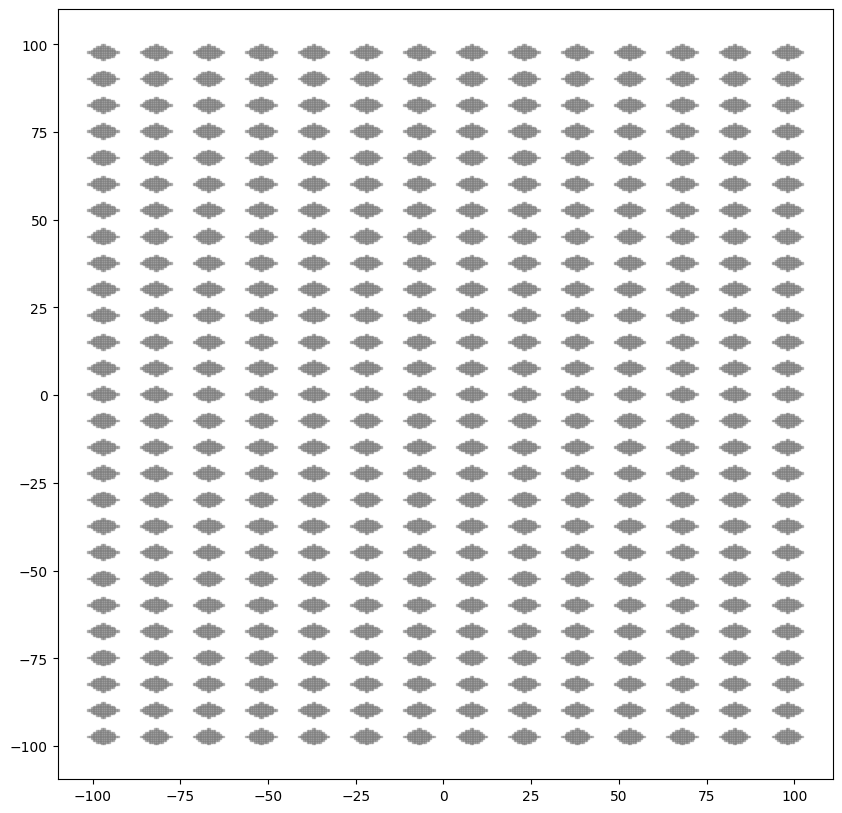

In [35]:
Dx = 5
grid_transformation = PatternTransformation(Dx=Dx, Dy=2.5, Od=Dx / 2)

grid_transformation_vector = PatternTransformationVector(
    pattern_unit=pattern_unit,
    pattern_transformation=grid_transformation,
    pattern_bound=((-100, 100), (-100, 100)),
)

grid_pattern = Pattern(
    pattern_unit=pattern_unit,
    pattern_transformation_vector=grid_transformation_vector,
)

print(grid_pattern.pattern_matrix.shape)

grid_pattern.generate_pattern_vector()

visualize_points(grid_pattern.pattern_matrix, k=grid_pattern.pattern_unit.grid.k)